CO2 and Temperature Data Analysis
CO2 data are daily measuremnts beginning in 1950 taken atop Mauna Loa on the Big Island of Hawaii.
Temperature measurements are from the NASA POWER site, selecting daily temperature results recorded at Mokapu Peninsula, the location of the Kaneohe MCAS.

In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Checkbox, VBox, HBox, Button
from IPython.display import clear_output
from statsmodels.tsa import *
#from mpl_interactions import ipyplot as iplt

%matplotlib inline

In [23]:
data = pd.read_csv('data/POWER_Point_Daily_19810101_20210331_021d4484N_157d7559W_LST.csv',index_col=False, header=11)


data['date'] = pd.to_datetime(dict(year=data.YEAR, month=data.MO, day=data.DY))
print('Data Columns : ',data.columns)
print(data['date'].head())

Data Columns :  Index(['YEAR', 'MO', 'DY', 'T2M', 'PRECTOTCORR', 'WS10M', 'date'], dtype='object')
0   1981-01-01
1   1981-01-02
2   1981-01-03
3   1981-01-04
4   1981-01-05
Name: date, dtype: datetime64[ns]


Take a close up look at temperature for the past few years. We plot from 2018 - dataset end.

       YEAR  MO  DY    T2M  PRECTOTCORR  WS10M       date
13515  2018   1   2  23.17         0.20   6.40 2018-01-02
13516  2018   1   3  22.87         0.10   7.55 2018-01-03
13517  2018   1   4  23.16         0.18   7.63 2018-01-04
13518  2018   1   5  22.90         0.11   8.07 2018-01-05
13519  2018   1   6  23.23         0.31   8.43 2018-01-06


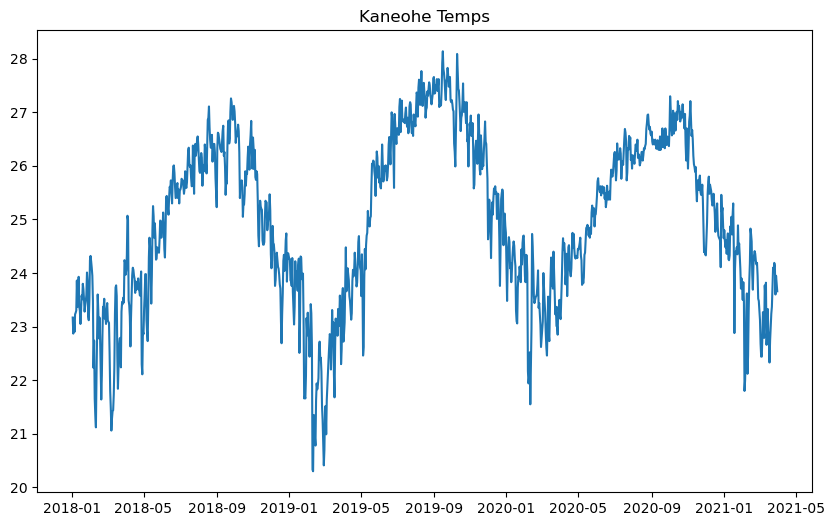

In [25]:
#plt.figure
plt.figure(figsize=[10,6])
ldata=data[data['date']>'2018-01-01']
print(ldata.head())
plt.title('Kaneohe Temps')

plt.plot(ldata['date'],ldata['T2M'])

plt.show()

ddata = data['T2M']

0     24.563734
1     24.561800
2     24.559866
3     24.557933
4     24.556000
        ...    
95    24.382432
96    24.380555
97    24.378678
98    24.376801
99    24.374926
Name: trend, Length: 100, dtype: float64


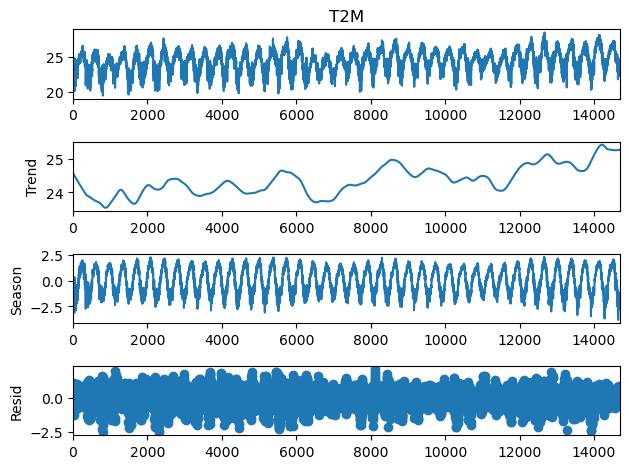

In [10]:
from statsmodels.tsa.seasonal import STL
# use 365 day period
stl = STL(ddata,365)
res = stl.fit()
fig = res.plot()
print(res.trend[0:100])
data['temp_trend']=res.trend.values

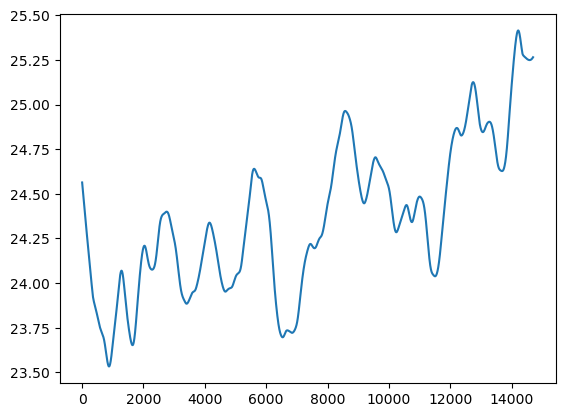

In [11]:
plt.plot(data['temp_trend'])

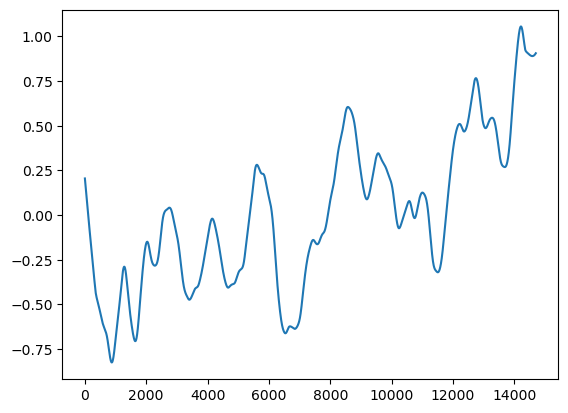

In [12]:
plt.plot(res.trend-np.mean(res.trend))

In [13]:
# read in co2
cdata = pd.read_csv('data/co2-ppm-daily_csv.csv')
cdata.head()

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


<AxesSubplot: xlabel='date'>

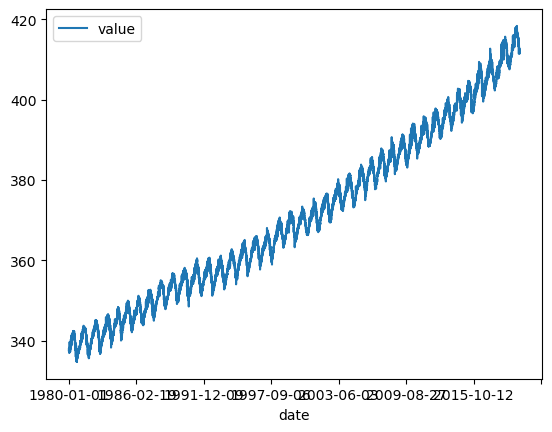

In [14]:

cdata_1980 = cdata[cdata['date']>='1980-01-01']
cdata_1980.plot(x='date',y='value')
#plt.show()

In [15]:
data.set_index('date',inplace=True)
data.head()

,YEAR,MO,DY,T2M,PRECTOTCORR,WS10M,temp_trend
date,,,,,,,
1981-01-01,1981,1,1,24.73,1.62,1.46,24.563734
1981-01-02,1981,1,2,24.55,0.47,5.41,24.561800
1981-01-03,1981,1,3,24.40,2.17,6.73,24.559866
1981-01-04,1981,1,4,22.91,2.07,6.07,24.557933
1981-01-05,1981,1,5,23.81,0.54,4.18,24.556000


In [16]:
#cdata.set_index('date',inplace=True)
cdata.head()
cdata.info
cdata['date']=pd.to_datetime(cdata['date'])

In [17]:
newdata=data.merge(cdata,on='date')
newdata.rename(columns={'value':'CO2'},inplace=True)
newdata.head()

,date,YEAR,MO,DY,T2M,PRECTOTCORR,WS10M,temp_trend,CO2
0,1981-01-01,1981,1,1,24.73,1.62,1.46,24.563734,338.43
1,1981-01-02,1981,1,2,24.55,0.47,5.41,24.561800,338.35
2,1981-01-03,1981,1,3,24.40,2.17,6.73,24.559866,338.34
3,1981-01-04,1981,1,4,22.91,2.07,6.07,24.557933,338.15
4,1981-01-05,1981,1,5,23.81,0.54,4.18,24.556000,339.91


0     338.656020
1     338.662932
2     338.669840
3     338.676742
4     338.683640
         ...    
95    339.288965
96    339.295346
97    339.301722
98    339.308091
99    339.314454
Name: trend, Length: 100, dtype: float64


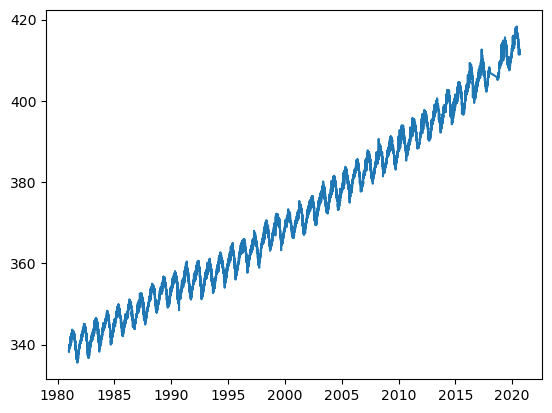

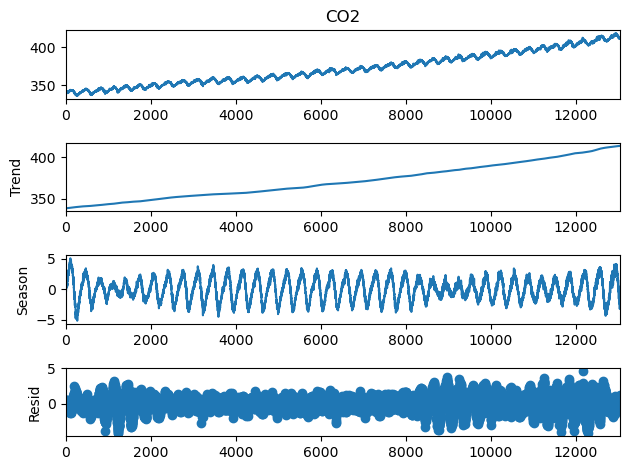

In [18]:
plt.plot('date','CO2',data=newdata)
stl = STL(newdata['CO2'],365)
res = stl.fit()
fig = res.plot()
print(res.trend[0:100])
newdata['co2_trend']=res.trend.values

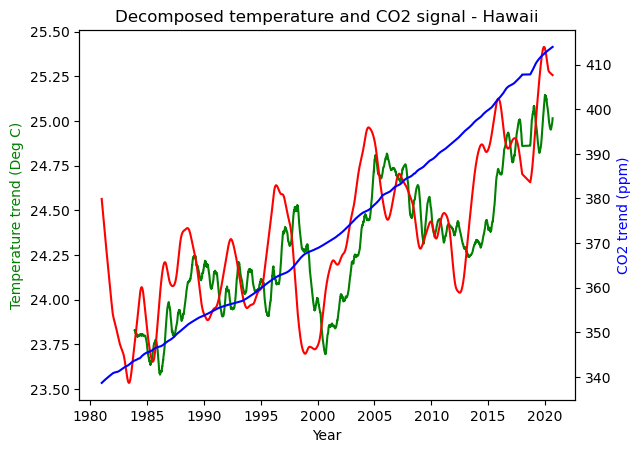

In [19]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
tempave =newdata['T2M'].rolling(1000).mean()
#ax1.plot('date', 'temp_trend', 'g-',data=newdata)
ax1.plot(newdata['date'],tempave,'g-')
ax1.plot(newdata['date'],newdata['temp_trend'],'r-')
ax2.plot('date', 'co2_trend', 'b-',data=newdata)

ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature trend (Deg C)', color='g')
ax2.set_ylabel('CO2 trend (ppm)', color='b')
plt.title('Decomposed temperature and CO2 signal - Hawaii')
plt.show()